In [1]:
import csv
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import seaborn as sns
import array as arr
import datetime as dt
import matplotlib.dates as dates
from matplotlib.dates import DateFormatter

%matplotlib inline

In [2]:
sns.set_theme(style="whitegrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '13', 'color': 'black'}

# MPE sensor data

In this notebook I read and plot the MPE data from the light sensor used during the AZKABAN-light experiments.
The data was first converted from hexidecimals to PAR values using a R script (logreader_Svalbard_noAltimeter.R).
The script required calibration values which I copied from the example file. The calibrations are from 16.06.2021)

## read data
Read csv file made from R code + write_csv. Combine the date, time and millisecond columns. Milliseconds increase from starttime, found milliseconds per second by calculated the modulus

In [5]:
MPE_data = pd.read_excel('G:/Nya-AZKABAN/FishMix-18012022/MPE-FishMix/MPE-converted_fishmix.xlsx')
MPE_data

,Date,Time,millis,Heading,Pitch,Roll,PAR,Temperature,Unnamed: 8,Unnamed: 9
0,2022-01-18,05:14:00,110113,155.6875,-2.1875,90.5000,0.119840,-10.899670,NaN,*9:15 UTC maybe?
1,2022-01-18,05:14:00,110307,155.6875,-2.1875,90.4375,0.119840,-10.899670,NaN,NaN
2,2022-01-18,05:14:00,110357,155.6250,-2.1875,90.4375,0.119840,-10.899670,NaN,NaN
3,2022-01-18,05:14:00,110407,155.5625,-2.2500,90.3750,0.119840,-10.899670,NaN,NaN
4,2022-01-18,05:14:00,110456,155.5625,-2.2500,90.4375,0.119840,-10.899670,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
115772,2022-01-18,11:52:03,23992800,200.6250,-12.9375,90.0625,0.000004,-2.187759,NaN,NaN
115773,2022-01-18,11:52:03,23992908,200.3750,-13.1875,90.0625,0.000004,-2.187759,NaN,NaN
115774,2022-01-18,11:52:03,23992963,199.8750,-13.6875,90.0625,0.000004,-2.187759,NaN,NaN
115775,2022-01-18,11:52:03,23993017,201.0625,-12.5000,90.0625,0.000004,-2.187759,NaN,NaN


In [7]:
# Add empty column for datetime 
MPE_data['fulldate'] = 0

# Add column with full datetime information
for ind in range(len(MPE_data.millis)):
    MPE_data['fulldate'][ind] = dt.datetime.strptime(str(MPE_data.Date[ind])[:-9] + ' ' + str(MPE_data.Time[ind]) + '.' + np.str(MPE_data.millis[ind]%1000), "%Y-%m-%d %H:%M:%S.%f")
    

C:\Users\mbd\anaconda3\envs\phd-env\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\mbd\anaconda3\envs\phd-env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Plot PAR

Adjust time to be in UTC which is +4 hours.//

Set limits to start and end of acoustic data collection

Text(0.5, 1.0, 'Artificial light changes during AZKABAN experiments')

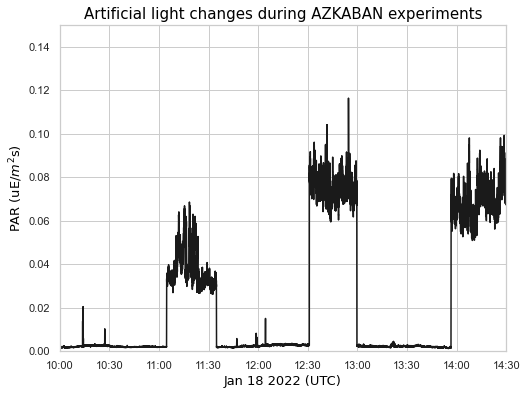

In [14]:
plt.figure(figsize=(8,6))
plt.plot(MPE_data.fulldate+dt.timedelta(hours=4, minutes=4), MPE_data.PAR, 'k')
ax = plt.gca()
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.xlabel('Jan 18 2022 (UTC)', axis_font)
plt.ylabel('PAR (uE/$m^2$s)', axis_font)
plt.ylim([-0,0.15])
ax.set_xlim([dt.datetime(2022, 1, 18, 10, 0, 0), dt.datetime(2022, 1, 18, 14, 30, 0)])
plt.title('Artificial light changes during AZKABAN experiments', title_font)

## Brief analysis:

The PAR light plot shows the three 30 minute segments of lights "on", each followed by an hour of lights off. During the whole time the dock lights were on and the moon is a wanning just after full moon. (Full moon January 17th 2022) 

The PAR sensor was placed 1.4 m below the transducer face, approximately at 2m depths below the surface. Due to the tide and the associated need to adjust the frame depth, the PAR sensor was not at exactly the same depth for the whole deployment.

The crane light was used for the lights on moments. The crane has a spotlight on the frame in the water. The Lysboom switch has two settings, I suspect the first lights on period has a lower PAR because it was set to only the first setting.

Strong spikes during the lights off periods are likely from someone wearing a headlamp checking periodically the frame, wind conditions and ice cover.